<a href="https://colab.research.google.com/github/aliwagdy2580/Deep-Learning/blob/main/%20Image%20Classification%20Using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

we'll build a CNN using Keras to use it classifying thousands of pictures in six different categories

Data link : https://www.kaggle.com/puneet6060/intel-image-classification

first to import libraries

In [1]:
#First, import the important libraries.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
import cv2
import os
from sklearn.utils import shuffle

import glob as gb


# Open Folders

In [2]:
class_names=['buildings','forest','glacier','mountain','sea','street']
img_size=150
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    
    
    class_name_labels={class_names:i for i,class_names in enumerate (class_names) }
    
    for folder in os.listdir(directory):
        
        label=class_name_labels[folder]
        
        path=os.path.join(directory,folder)
        for image in tqdm(os.listdir(path)): #Extracting the file name of the image from Class Label folder
            
            path_image=os.path.join(path,image)
            
            image = cv2.imread(path_image) #Reading the image (OpenCV)
            
            #Resize the image, Some images are different sizes. (Resizing is very Important)
            image = cv2.resize(image,(img_size,img_size)) 
            
            # Append the image and its corresponding label to the output
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {0:'buildings', 1:'forest', 2:'forest', 3:'mountain', 4:'sea', 5:'street'}
    
    return labels[class_code]

In [4]:
images,labels = get_images('drive/MyDrive/archive/seg_train/seg_train') #Extract the training images from the folders.

train_images = np.array(images) #converting the list of images to numpy array.
train_labels = np.array(labels)

100%|██████████| 2191/2191 [20:13<00:00,  1.81it/s]


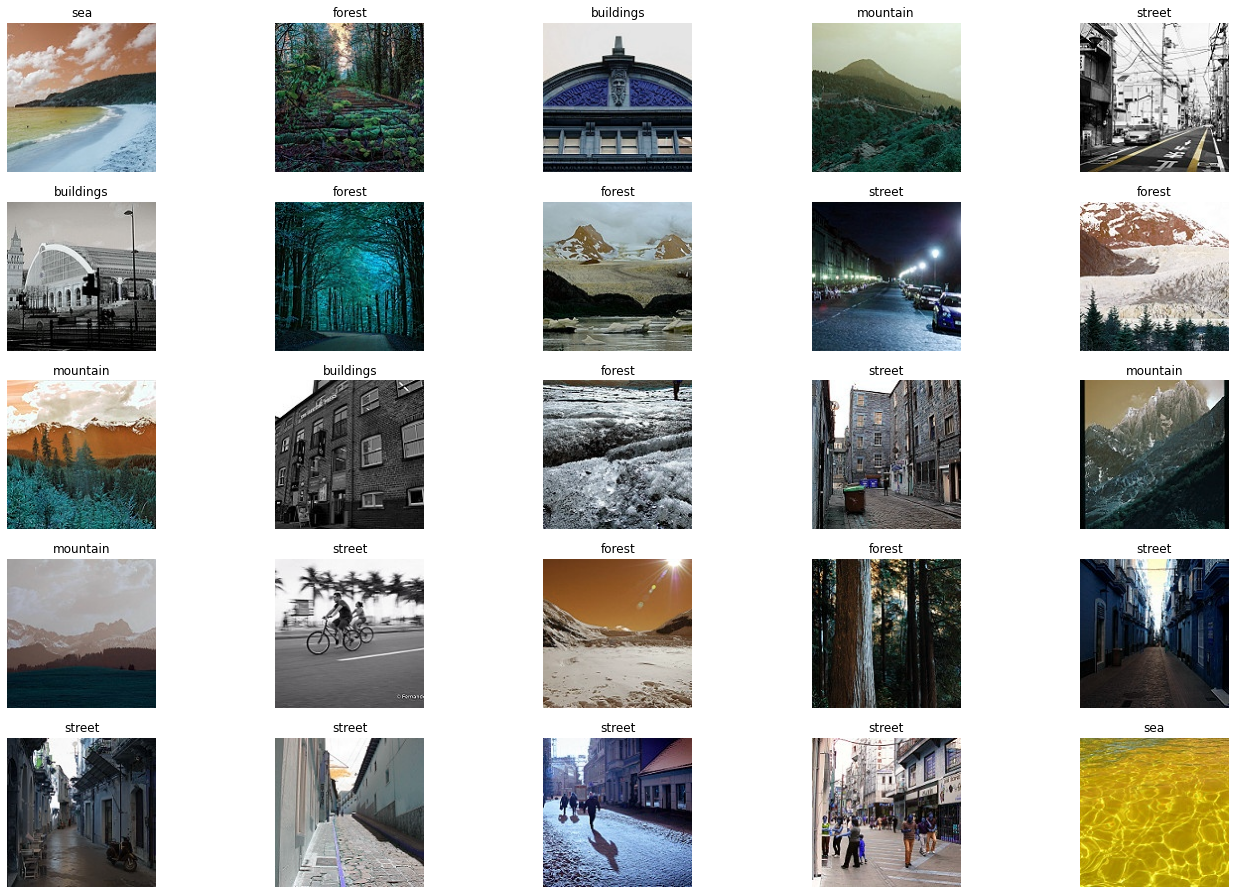

In [5]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5):
    for j in range(0,5):
        rnd_number = np.random.randint(0,len(train_images))
        ax[i,j].imshow(train_images[rnd_number])
        ax[i,j].set_title(get_classlabel(train_labels[rnd_number]))
        ax[i,j].axis('off')

# Building The Model

In [19]:
model = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Dropout(rate=0.2),
        keras.layers.Conv2D(140,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Dropout(rate=0.2),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 146, 146, 150)     270150    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 150)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 150)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 140)       189140    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 128)       161408    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 50)       

In [20]:
history=model.fit(train_images,train_labels,epochs=35,validation_split=0.20)

Epoch 1/35
351/351 [==============================] - 43s 120ms/step - loss: 2.3717 - accuracy: 0.2657 - val_loss: 1.1631 - val_accuracy: 0.5543
Epoch 2/35
351/351 [==============================] - 42s 119ms/step - loss: 1.2155 - accuracy: 0.5150 - val_loss: 1.0210 - val_accuracy: 0.6038
Epoch 3/35
351/351 [==============================] - 42s 120ms/step - loss: 1.0743 - accuracy: 0.5747 - val_loss: 0.9264 - val_accuracy: 0.6331
Epoch 4/35
351/351 [==============================] - 42s 119ms/step - loss: 0.9773 - accuracy: 0.6250 - val_loss: 0.8225 - val_accuracy: 0.6844
Epoch 5/35
351/351 [==============================] - 42s 120ms/step - loss: 0.9064 - accuracy: 0.6575 - val_loss: 0.8017 - val_accuracy: 0.7057
Epoch 6/35
351/351 [==============================] - 42s 119ms/step - loss: 0.8294 - accuracy: 0.6884 - val_loss: 0.7267 - val_accuracy: 0.7435
Epoch 7/35
351/351 [==============================] - 42s 119ms/step - loss: 0.7812 - accuracy: 0.7120 - val_loss: 0.7261 - val_ac

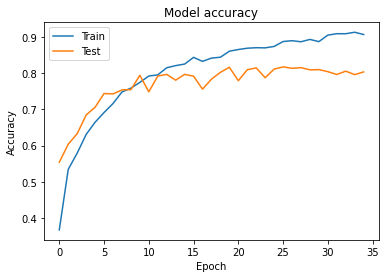

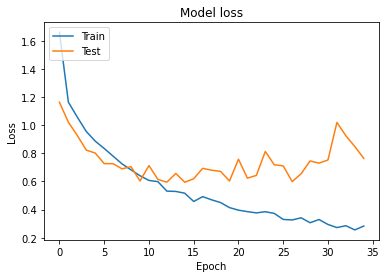

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [12]:
test_images,test_labels = get_images('drive/MyDrive/archive/seg_test/seg_test')
test_images = np.array(test_images)
test_labels = np.array(test_labels)


100%|██████████| 437/437 [00:01<00:00, 395.77it/s]


In [13]:
print(test_images.shape)
print(test_labels.shape)

(3000, 150, 150, 3)
(3000,)


In [22]:
model.evaluate(test_images,test_labels, verbose=1)

94/94 [==============================] - 3s 28ms/step - loss: 0.7794 - accuracy: 0.8053


[0.7793712019920349, 0.8053333163261414]

# import prediction datasets

In [18]:
pred_path='drive/MyDrive/archive/seg_pred/seg_pred'

pred_images = []
    
for image in tqdm(os.listdir(pred_path)): #Extracting the file name of the image from Class Label folder

    path_image=os.path.join(pred_path,image)

    image = cv2.imread(path_image) #Reading the image (OpenCV)

    #Resize the image, Some images are different sizes. (Resizing is very Important)
    image = cv2.resize(image,(img_size,img_size)) 

        # Append the image and its corresponding label to the output
    pred_images.append(image)
pred_images=np.array(pred_images)
        
print(pred_images.shape)

100%|██████████| 7301/7301 [1:14:56<00:00,  1.62it/s]


(7301, 150, 150, 3)


In [23]:
y_pred=model.predict(pred_images)

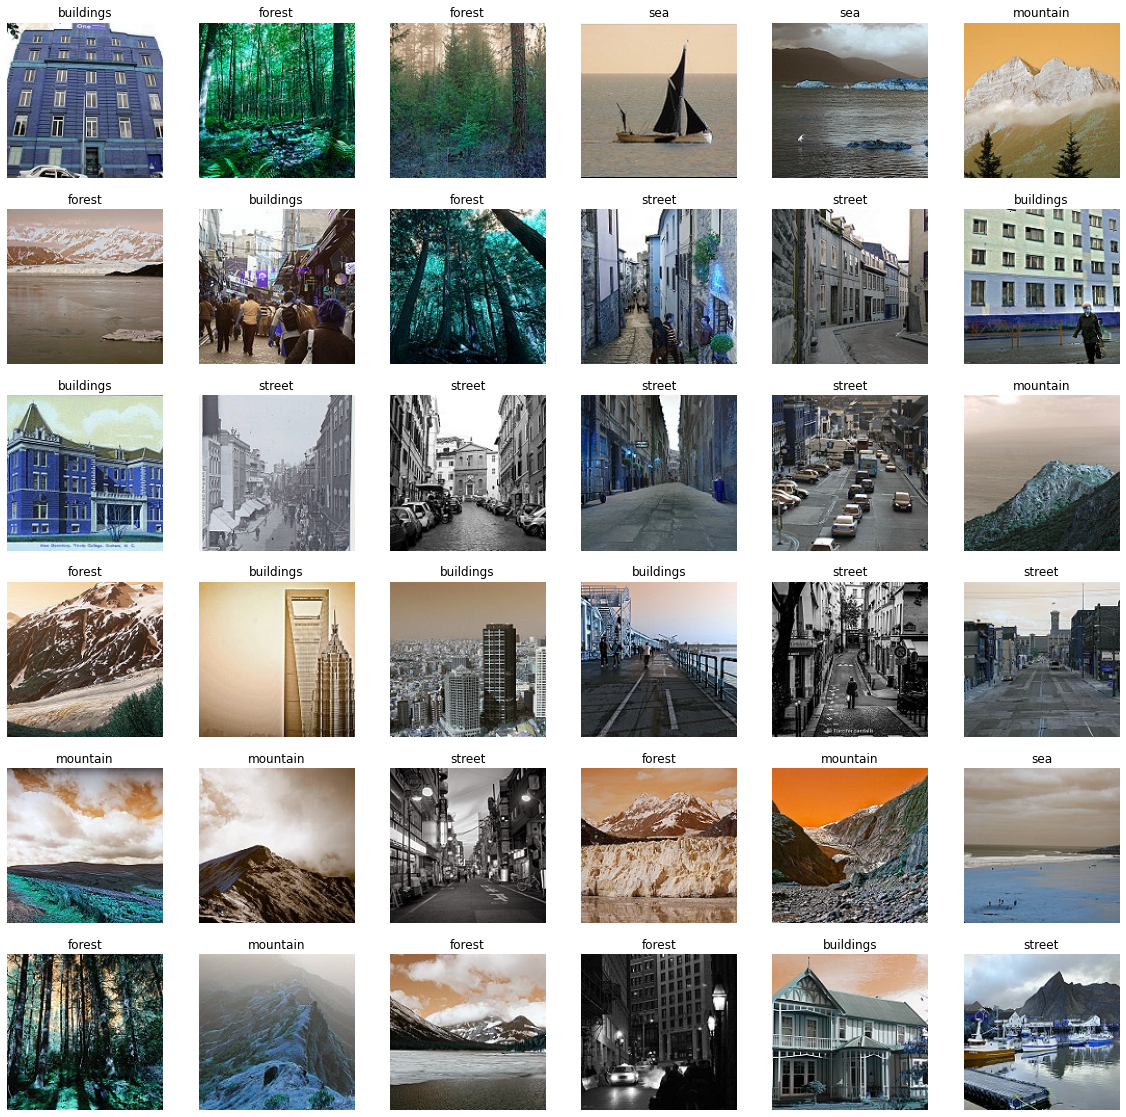

In [24]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(pred_images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(pred_images[i])   
    plt.axis('off')
    plt.title(get_classlabel(np.argmax(y_pred[i])))